# Make images come alive with scikit-image


## RGB to grayscale
In this exercise you will load an image from scikit-image module data and make it grayscale, then compare both of them in the output.

We have preloaded a function show_image(image, title='Image') that displays the image using Matplotlib. You can check more about its parameters using ?show_image() or help(show_image) in the console.



### init

In [11]:
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
import inspect
print_func(show_image)
"""

import matplotlib.pyplot as plt
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()



### code

In [14]:
#conda install scikit-image

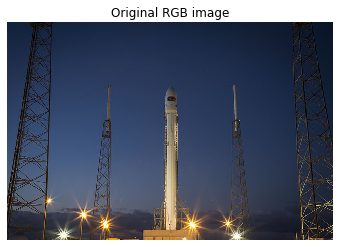

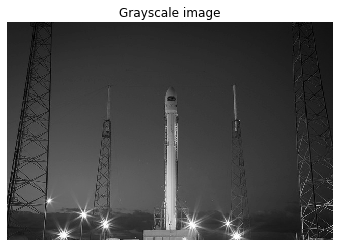

In [15]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# NumPy for images


## Flipping out
As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.

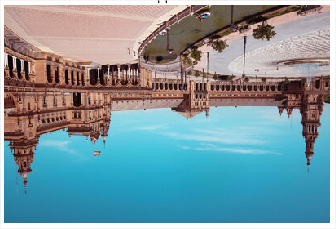
City of Seville upside-down
Image loaded as flipped_seville.
Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the show_image() function.
NumPy is already imported as np.

### init

In [17]:
import numpy as np
import matplotlib.pyplot as plt
flipped_seville = plt.imread('data_from_datacamp/sevilleup.jpg')

### code

In [19]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

In [20]:
# Flip the previous image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

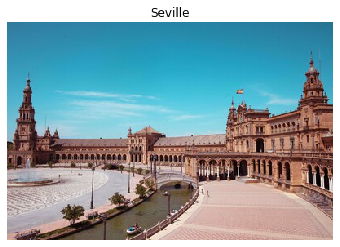

In [21]:
# Show the resulting image
show_image(seville_horizontal_flip, 'Seville')

## Histograms
In this exercise, you will analyze the amount of red in the image. To do this, the histogram of the red channel will be computed for the image shown below:

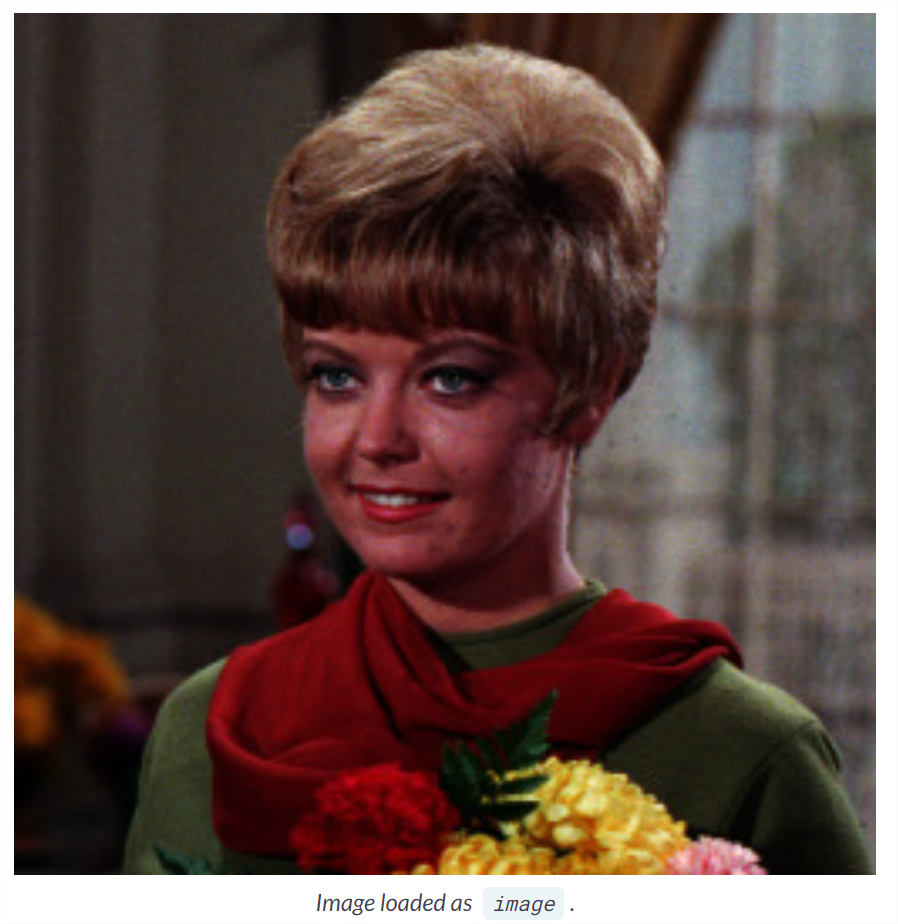
Image loaded as image.
Extracting information from images is a fundamental part of image enhancement. This way you can balance the red and blue to make the image look colder or warmer.

You will use hist() to display the 256 different intensities of the red color. And ravel() to make these color values an array of one flat dimension.

Matplotlib is preloaded as plt and Numpy as np.

Remember that if we want to obtain the green color of an image we would do the following:

green = image[:, :, 1]

### init

In [31]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
image_256_256_3 = image.flatten()
uploadToFileIO(image_256_256_3)
"""

tobedownloaded="""
{numpy.ndarray: {'image_256_256_3.csv': 'https://file.io/0e8NyX'}}
"""
prefixToc = '2.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
image_256_256_3 = loadNDArrayFromCsv(prefix+'image_256_256_3.csv')
image = np.reshape(image_256_256_3, (256,256,3))
image =image.astype('uint8')


Téléchargements déjà effectués - SKIP


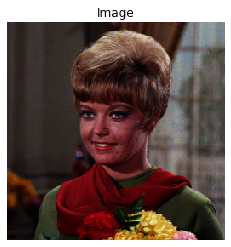

In [32]:
show_image(image)

### code

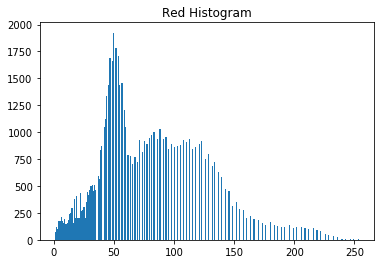

In [34]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

# Getting started with thresholding


## Apply global thresholding
In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using threshold_otsu() and apply it to the image.

You'll see the resulting binarized image when using the show_image() function, previously explained.

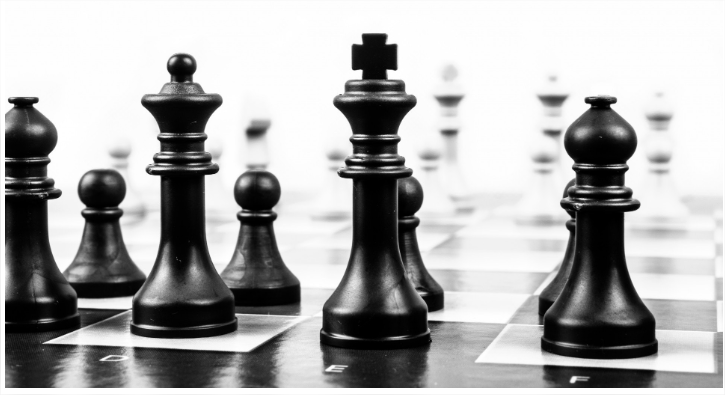
Chess pieces
Image loaded as chess_pieces_image.
Remember we have to turn colored images to grayscale. For that we will use the rgb2gray() function learned in previous video. Which has already been imported for you.

### init

In [35]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
chess_pieces_image_1271_1920_3 = chess_pieces_image.flatten()
uploadToFileIO(chess_pieces_image_1271_1920_3)
"""

tobedownloaded="""
{numpy.ndarray: {'chess_pieces_image_1271_1920_3.csv': 'https://file.io/AZmIMy'}}
"""
prefixToc = '3.1'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import loadNDArrayFromCsv
chess_pieces_image_1271_1920_3 = loadNDArrayFromCsv(prefix+'chess_pieces_image_1271_1920_3.csv')
chess_pieces_image = np.reshape(chess_pieces_image_1271_1920_3, (1271,1920,3))
chess_pieces_image =chess_pieces_image.astype('uint8')



Téléchargements à lancer

{numpy.ndarray: {"chess_pieces_image_1271_1920_3.csv": "https://file.io/AZmIMy"}}

{'numpy.ndarray': {'chess_pieces_image_1271_1920_3.csv': 'https://file.io/AZmIMy'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:04 --:--:--     0
100 15360    0 15360    0     0   2234      0 --:--:--  0:00:06 --:--:--  2362
100  315k    0  315k    0     0  44750      0 --:--:--  0:00:07 --:--:-- 55815
100 1003k    0 1

### code

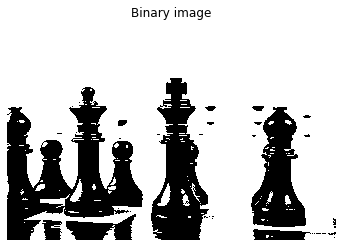

In [36]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

## When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using threshold_otsu(). However, if there's uneven background illumination, adaptive thresholding threshold_local() (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.

Page with text
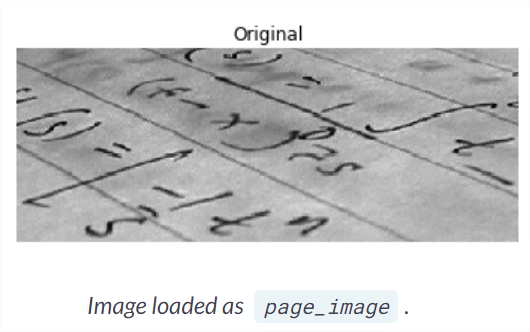
Image loaded as page_image.

### init

In [74]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(page_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'page_image[172_448].csv': 'https://file.io/Qmazrg'}}
"""
prefixToc = '3.2'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
page_image = getImage(prefix+'page_image[172_448].csv')



Téléchargements déjà effectués - SKIP


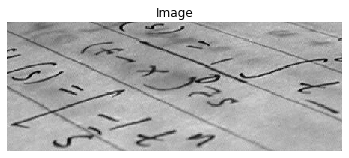

In [75]:
show_image(page_image)

### code

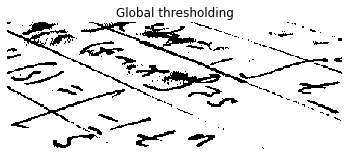

In [76]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

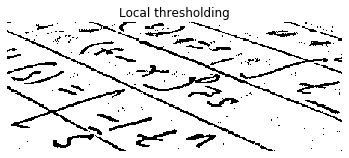

In [77]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

## Trying other methods
As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

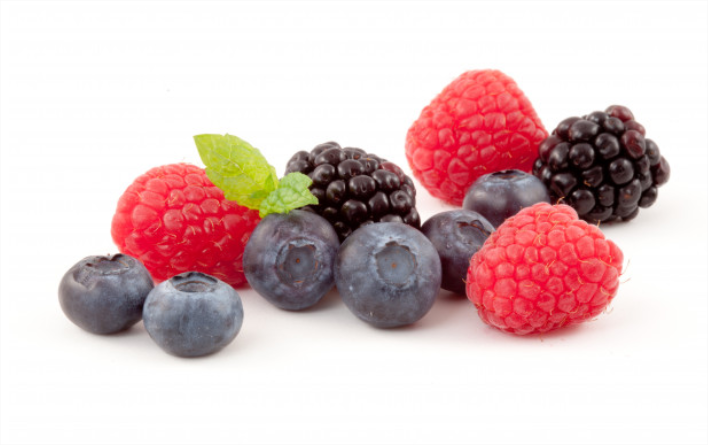
Forest fruits
Image loaded as fruits_image.
You will apply this function to this image, matplotlib.pyplot has been loaded as plt. Remember that you can use try_all_threshold() to try multiple global algorithms.

### init

In [78]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(fruits_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'fruits_image[417_626_3].csv': 'https://file.io/9djqpT'}}
"""
prefixToc = '3.3'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
fruits_image = getImage(prefix+'fruits_image[417_626_3].csv')



Téléchargements à lancer

{numpy.ndarray: {"fruits_image[417_626_3].csv": "https://file.io/9djqpT"}}

{'numpy.ndarray': {'fruits_image[417_626_3].csv': 'https://file.io/9djqpT'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100  120k    0  120k    0     0  40891      0 --:--:--  0:00:03 --:--:-- 40905
100 3840k    0 3840k    0     0   976k      0 --:--:--  0:00:03 --:--:--  977k
100 4588k    0 4588k    0     0  1119k      0 --:--:--  0:00:04 --:--:-- 1120k


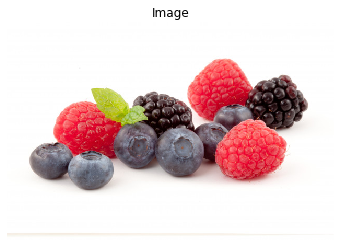

In [79]:
show_image(fruits_image)

### code

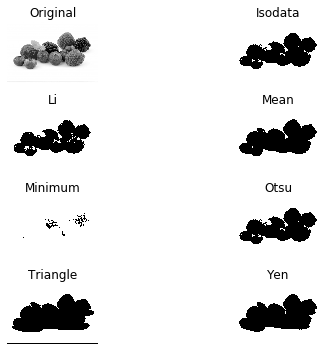

In [80]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

## Apply thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

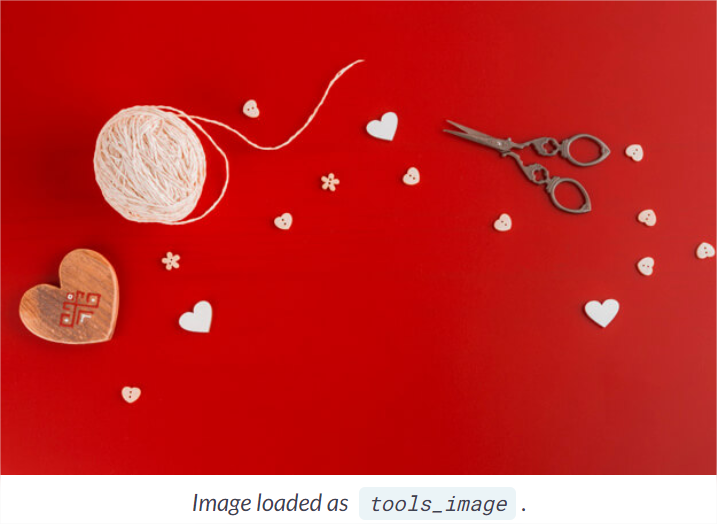
Several tools for handcraft art
Image loaded as tools_image.
What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

### init

Téléchargements à lancer

{numpy.ndarray: {"tools_image[417_626_3].csv": "https://file.io/lzpZyF"}}

{'numpy.ndarray': {'tools_image[417_626_3].csv': 'https://file.io/lzpZyF'}}
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 3450k    0 3450k    0     0   937k      0 --:--:--  0:00:03 --:--:--  937k
100 4588k    0 4588k    0     0  1167k      0 --:--:--  0:00:03 --:--:-- 1167k


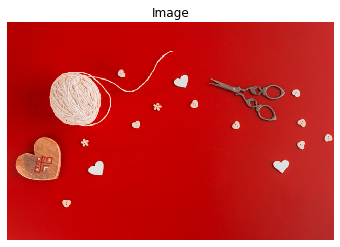

In [81]:
#upload and download

from downloadfromFileIO import saveFromFileIO
""" à executer sur datacamp: (apres copie du code uploadfromdatacamp.py)
uploadToFileIO(tools_image, image=True)
"""

tobedownloaded="""
{numpy.ndarray: {'tools_image[417_626_3].csv': 'https://file.io/lzpZyF'}}
"""
prefixToc = '3.4'
prefix = saveFromFileIO(tobedownloaded, prefixToc=prefixToc, proxy="10.225.92.1:80")

#initialisation

from downloadfromFileIO import getImage
tools_image = getImage(prefix+'tools_image[417_626_3].csv')
show_image(tools_image)


### code

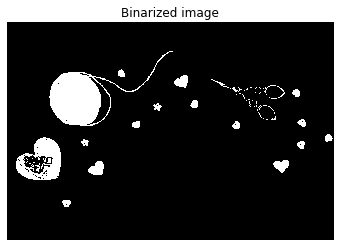

In [82]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(tools_image)

# Obtain the binary image by applying thresholding
binary_image = tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')